# Logistic Regression

## Why Not Linear Regression?

Linear regression is a fundamental statistical technique that is widely used for modeling the relationship between a dependent variable and one or more independent variables. It has its strengths and weaknesses, and there are situations where it may not be suitable {cite:p}`james2023introduction`:

1. **Nonlinear Relationships:** Linear regression assumes a linear relationship between the independent and dependent variables. If the true relationship is nonlinear, using linear regression can lead to poor model fit and inaccurate predictions.

2. **Complex Interactions:** Linear regression is limited in handling complex interactions between variables. If the relationship involves nonlinear effects, or higher-order terms, linear regression may not capture these nuances effectively.

3. **Assumption Violations:** Linear regression assumes that the residuals (the differences between observed and predicted values) are normally distributed and have constant variance. If these assumptions are violated, the results and inferences from linear regression may be unreliable.

4. **Outliers and Influential Points:** Linear regression is sensitive to outliers and influential data points. A single outlier can affect the regression line and the estimated coefficients.

5. **Categorical and Binary Variables:** While linear regression can handle continuous and numeric independent variables, it struggles with categorical or binary predictors without appropriate encoding or treatment.

6. **Multi-Collinearity:** When the independent variables in a linear regression model are highly correlated with each other, it can lead to multicollinearity issues. This makes it challenging to interpret the individual contributions of these variables.

7. **Limited in Handling Non-Parametric Data:** Linear regression is a parametric method, meaning it makes assumptions about the underlying data distribution. If the data is non-parametric or has heavy-tailed distributions, linear regression may not be appropriate.

In cases where these limitations are significant, other techniques such as nonlinear regression, generalized linear models, decision trees, support vector machines, neural networks, or other advanced statistical and machine learning methods may be more suitable. The choice of the appropriate modeling technique depends on the data.

## Logistic Regression: Predicting a Binary Response Variable

Logistic regression is a powerful statistical method tailored specifically for binary classification tasks. Its primary objective is to predict a binary response variable, such as yes/no or 0/1, by leveraging the impact of one or more predictor variables. This approach is effectively represented by the logistic regression model {cite:p}`james2023introduction`.

### Logistic Model

At the core of logistic regression is its ingenious model, which seamlessly integrates predictor variables within a linear framework, further molded by the logistic function. This fusion aims to predict the probability of the positive class (class 1) in a binary response scenario. The model is encapsulated by the following equation {cite:p}`james2023introduction`:

\begin{align}
\log\left(\frac{p(X)}{1 - p(X)}\right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p,
\end{align}

In this equation:
- $X = (X_1, ..., X_p)$ constitutes the vector of predictor variables (features).
- $\beta_0, \beta_1, ..., \beta_p$ take on the roles of coefficients, encompassing both the intercept and each predictor variable's contribution.
- $p(X)$ designates the probability of the positive class, informed by the predictor variables.

Notably, the term $\log[p(X)/[1 - p(X)]]$, dubbed **the log-odds**, encapsulates the relationship between the probability of positive and negative outcomes {cite:p}`james2023introduction`. The odds ratio, which is the exponentiated value of the log-odds, represents the ratio of the odds of the positive class to the odds of the negative class.

### Estimating Probabilities

The logistic model allows us to deduce the estimated probability of the positive class given the predictor variables ($p(X)$) through the following equation:

\begin{align}
p(X) = \frac{e^{\beta_0 + \beta_1 X_1 + \dots + \beta_p X_p}}{1 + e^{\beta_0 + \beta_1 X_1 + \dots + \beta_p X_p}},
\end{align}

In this equation, the exponential function (approximately 2.71828) plays a pivotal role in the transformation. This transformation, facilitated by the logistic function, also known as the sigmoid function, molds the linear combination of predictor variables into a probability value that spans the entire spectrum between 0 and 1.

### Sigmoid (Logistic) Function

The equation given below:

\begin{equation}
\log\left(\frac{p(X)}{1 - p(X)}\right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p
\end{equation}

is closely connected to the sigmoid (logistic) function within the context of logistic regression, a method used for binary classification.

In logistic regression, the objective is to estimate the likelihood of the positive outcome (class 1) based on the values of certain predictor variables, such as $X_1, X_2, \ldots, X_p$. The left side of the equation, $\log\left(\frac{p(X)}{1 - p(X)}\right)$, signifies the log-odds (logit) of the probability of the positive outcome given the predictor variables. This transformation linearizes the connection between the predictor variables and the probability.

Now, let's introduce the sigmoid function. The [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), denoted as $f(x) = \dfrac{1}{1 + e^{-x}}$, converts a real-number $x$ into a probability ranging from 0 to 1. In the logistic regression model, this can be related to $p(X)$ as follows:

\begin{equation}p(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \dots + \beta_p X_p)}}\end{equation}

In this expression, $p(X)$ represents the probability of the positive outcome. The right-hand side is a linear combination of predictor variables, each multiplied by coefficients $\beta_0, \beta_1, \ldots, \beta_p$. The sigmoid function, also known as the logistic function, is applied to this combination, ensuring that the result, $p(X)$, remains within the range of 0 to 1.

In essence, the logistic regression model incorporates the sigmoid function to transform the linear combination of predictor variables into a valid probability value, enabling binary classification decisions based on this probability threshold.

`````{admonition} Note
:class: warning

`scipy.special.expit` is a function within the SciPy library, a widely recognized open-source resource for scientific and mathematical computations. This function, also known as the "exponential of the logistic function," serves the purpose of executing a logistic sigmoid transformation. It operates on either a single value or an array as input and employs the logistic sigmoid function, mathematically expressed as:

\begin{equation}f(x) = \frac{1}{1 + e^{-x}}\end{equation}

Here, $e$ signifies the natural logarithm base, while $x$ denotes the input variable. The fundamental role of the logistic sigmoid function is to transform input values into a bounded range of 0 to 1. This property finds extensive application in various domains, including machine learning, specifically in logistic regression, where it is instrumental in modeling the probability of binary outcomes.

`````

<font color='Blue'><b>Example:</b></font>
Let's examine a straightforward scenario with a single variable, denoted as X, and a dependent variable, y. In this instance, we generate X values from a normal distribution with a mean ($\mu$) of 10 and a standard deviation ($\sigma$) of 2. The variable y is defined as follows:

\begin{equation}
y = \begin{cases}
1, & \text{if } x > \mu \\
0, & \text{otherwise}.
\end{cases}
\end{equation}

Next, we estimate the probability of the default outcome using linear regression, which is depicted in the top plot. It's worth noting that some of the estimated probabilities turn out to be negative, which is problematic because probabilities should always fall within the range of 0 to 1.

To address this issue, we employ logistic regression, as shown in the bottom plot. In logistic regression, all estimated probabilities strictly conform to the valid probability range, ensuring that they stay between 0 and 1.

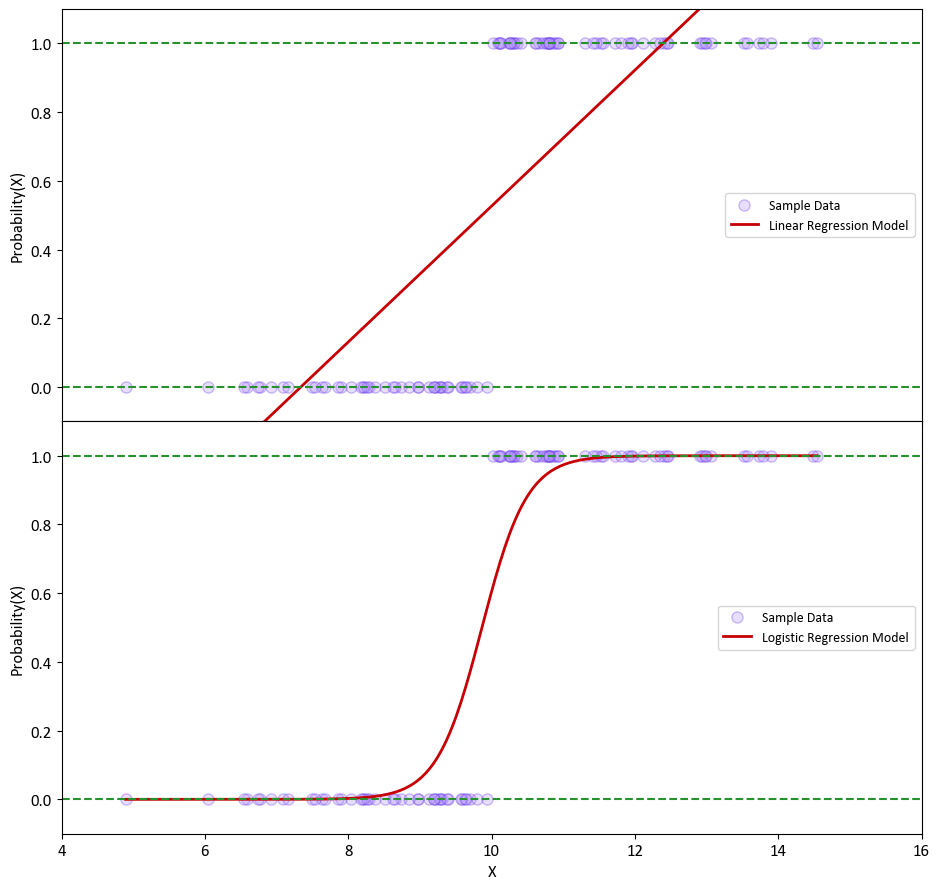

In [1]:
import matplotlib.pyplot as plt
plt.style.use('../mystyle.mplstyle')
import numpy as np
# from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression

mu, sigma = 10, 2  # mean and standard deviation
np.random.seed(0)
X = np.random.normal(mu, sigma, 100)
y = np.where(X > mu, 1, 0)
X = X.reshape(-1, 1)
X_gen = np.linspace(X.min(), X.max(), 300)

# Create the models
models = [LinearRegression(), LogisticRegression()]

# Titles for the plots
titles = [ "Linear Regression Model", "Logistic Regression Model"]

fig, axes = plt.subplots(2, 1, figsize=(9.5, 9), sharex=True, gridspec_kw={'hspace': 0})

for i, ax in enumerate(axes):
    model = models[i]
    model.fit(X, y)

    if i == 1:
        Px = (1/(1 + np.exp(- (X_gen * model.coef_ + model.intercept_)))).flatten()
        # Or we could utilize scipy.special.expit
        # Px = expit(X_gen * model.coef_ + model.intercept_).ravel()
    else:
        Px = model.coef_ * X_gen + model.intercept_

    ax.scatter(X, y, color='#b496ff', ec='#602ce5', alpha=0.3, label="Sample Data")
    ax.plot(X_gen, Px, color='#C60004', lw=2, label=titles[i])
    ax.set_xlim([4, 16])
    ax.hlines([0, 1], *ax.get_xlim(), linestyles='dashed', color = '#26912d', lw=1.5)
    ax.set(xlabel='' if i == 0 else 'X', ylabel='Probability(X)')
    ax.grid(False)
    ax.legend(loc = 'right')
    ax.set_ylim(-0.1, 1.1)

plt.tight_layout()

`````{admonition} Remark
:class: important

Logistic regression is primarily used for classification, not regression, despite its name. It's a statistical model used to predict the probability of a binary outcome, typically denoted as class 0 and class 1. The logistic regression model estimates the probability that a given input belongs to one of these two classes. This makes it a valuable tool for various classification tasks, such as spam detection, disease diagnosis, or sentiment analysis. In logistic regression, the output is a probability score, and a threshold (often 0.5) is applied to classify the input into one of the two classes. Therefore, it's fundamentally a classification technique, even though the term "regression" is in its name.

`````

### Finding the Coefficients

In logistic regression, the goal is to find the optimal coefficients ($\beta_0$, $\beta_1$, ..., $\beta_p$) of the model that best fits the data. This is achieved through the Maximum Likelihood Estimation (MLE) method. MLE aims to determine the coefficient values that maximize the likelihood of observing the actual binary outcomes in the dataset, given the predictor variables.

Here's a step-by-step refined explanation of how to find these coefficients in logistic regression:

1. **Formulate the Likelihood Function**: Begin by defining the likelihood function, denoted as $L(\beta_0, \beta_1, ..., \beta_p)$, which represents the probability of observing the binary outcomes (0s and 1s) based on the logistic regression model. This function is a mathematical representation of the relationship between the coefficients and the observed data.

2. **Take the Natural Logarithm**: Simplify the likelihood calculations by working with the natural logarithm of the likelihood function, denoted as $\ell(\beta_0, \beta_1, ..., \beta_p)$. This transformation preserves the underlying structure while making computations more manageable.

3. **Maximize the Log-Likelihood**: Utilize optimization techniques, often numerical methods, to find the coefficient values that maximize the log-likelihood function $\ell(\beta_0, \beta_1, ..., \beta_p)$. The goal is to identify the coefficient values that make the observed data most likely under the logistic regression model.

4. **Interpret the Coefficients**: Once the estimated coefficients $\hat{\beta}_0, \hat{\beta}_1, ..., \hat{\beta}_p$ are obtained, interpret their values. Each coefficient (excluding $\hat{\beta}_0$, the intercept) represents the change in the log-odds (logit) of the positive outcome (class 1) associated with a one-unit change in the corresponding predictor variable while holding other variables constant.

Practical implementations of logistic regression, especially with multiple predictor variables ($X_1$, $X_2$, ..., $X_p$) and non-linear optimization, can be complex. The choice of optimization method may depend on the software libraries or statistical packages you are using.

Most modern statistical software packages for data analysis, such as Python's scikit-learn or R's glm function, provide built-in functions to perform logistic regression. These functions automatically handle the MLE process and provide the estimated coefficients. However, if manual implementation of logistic regression is necessary, you'll likely rely on optimization algorithms like gradient descent or more advanced techniques. Proficiency in numerical optimization and statistical concepts is crucial for successfully implementing this process from scratch.

`````{admonition} Remark
:class: important

Maximum Likelihood Estimation (MLE) is a statistical method used to estimate the parameters of a statistical model. The goal of MLE is to find the parameter values that make the observed data most probable under the assumed probabilistic model. This technique is widely used in various fields, including statistics, econometrics, machine learning, and many other areas where data analysis and modeling are essential.

Here's a more detailed explanation of the key concepts in Maximum Likelihood Estimation:

1. **Likelihood Function**: The likelihood function, denoted as $L(\theta)$, is a fundamental concept in MLE. It represents the probability of observing the given data points, assuming a specific parametric model. For a continuous distribution, the likelihood is a function of the parameters of that distribution.

2. **Parameter Estimation**: In many statistical models, there are parameters (denoted as $\theta$) that need to be estimated from the data. The likelihood function is a function of these parameters. The MLE method seeks the values of these parameters that maximize the likelihood function.

3. **Log-Likelihood**: To simplify calculations and numerical stability, it's common to work with the natural logarithm of the likelihood function, denoted as $\ell(\theta)$. Maximizing the log-likelihood is equivalent to maximizing the likelihood itself, as the logarithm is a monotonically increasing function.

4. **Optimization**: Finding the values of the parameters that maximize the log-likelihood function $\ell(\theta)$ is an optimization problem. Various optimization algorithms, such as gradient descent, Newton-Raphson, or more advanced techniques, can be employed to search for the optimal parameter values.

5. **Statistical Inference**: Once the MLE estimates of the parameters, denoted as $\hat{\theta}$, are obtained, they can be used for statistical inference. This includes making predictions, calculating confidence intervals, performing hypothesis tests, and evaluating the goodness of fit of the model to the data.

MLE is a powerful and widely used method because it provides estimates that are asymptotically unbiased and efficient under certain conditions. However, it's essential to ensure that the chosen model is appropriate for the data, as MLE can be sensitive to model misspecification. Additionally, for complex models, numerical optimization may be computationally intensive, and care must be taken to handle issues like local optima.

`````

### Translating Theory into Python

In the world of Python, the practical implementation of logistic regression is greatly simplified by leveraging powerful libraries like scikit-learn. This Python library provides a comprehensive toolkit for machine learning, and the `LogisticRegression` class from scikit-learn is an invaluable tool for binary classification tasks. By utilizing this class, you can effortlessly apply logistic regression to your dataset, allowing you to fit the model and gain access to the estimated coefficients.

For those eager to explore the depths of logistic regression within the scikit-learn ecosystem, the official scikit-learn documentation for the `LogisticRegression` class serves as a valuable resource. It acts as a gateway to the `LogisticRegression` class, providing detailed insights and instructions on how to utilize it effectively: [scikit-learn Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). This documentation is an essential reference for both beginners and experienced practitioners, offering guidance on various parameters, techniques, and best practices for applying logistic regression in diverse real-world scenarios.

<font color='Blue'><b>Example:</b></font> In the next example, we turn our attention to the utilization of the Default dataset from the ISLR repository {cite:p}`james2023introduction`. This dataset, available at (https://www.statlearning.com/resources-python). This dataset encapsulates a comprehensive record of instances where customers defaulted on their credit obligations.

In [2]:
import pandas as pd
Default = pd.read_csv('Default.csv')
Default.columns = [x.title() for x in Default.columns]
display(Default.head(5))

,Default,Student,Balance,Income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


`````{admonition} Note
:class: warning

In the context of credit cards, "default" refers to the failure of a cardholder to meet the agreed-upon terms and obligations associated with the credit card account. This typically includes missing minimum monthly payments, exceeding the credit limit, or violating other terms specified in the credit card agreement. When a cardholder defaults, it indicates a breach of the contract between the cardholder and the credit card issuer.

`````

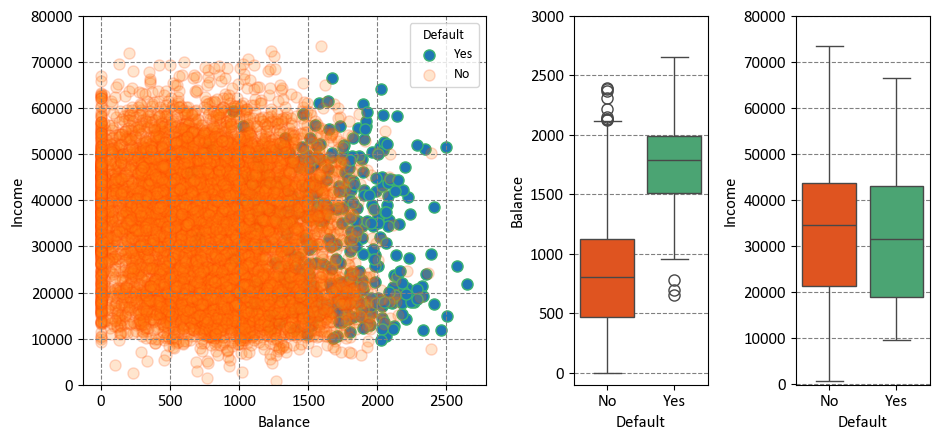

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('../mystyle.mplstyle')

fig, ax = plt.subplots(1, 3, figsize=(9.5, 4.5), gridspec_kw = {'width_ratios':[.6,.2,.2]})
CP = {'Yes': 'MediumSeaGreen', 'No': 'OrangeRed'}
# Left
_ = ax[0].scatter(Default.loc[Default.Default == 'Yes', 'Balance'],
              Default.loc[Default.Default == 'Yes', 'Income'], 
              edgecolors=CP['Yes'], label='Yes')
_ = ax[0].scatter(Default.loc[Default.Default == 'No', 'Balance'],
              Default.loc[Default.Default == 'No', 'Income'], 
              edgecolors=CP['No'], label='No', alpha=0.2)
_ = ax[0].set_ylim([0, 8e4])
_ = ax[0].set(xlabel='Balance', ylabel='Income')
_ = ax[0].legend(title='Default', loc='upper right')
# Center
_ = sns.boxplot(x='Default', y='Balance', data=Default, orient='v', ax=ax[1], palette=CP)
_ = ax[1].set_ylim([-100, 3e3])
# Right
_ = sns.boxplot(x='Default', y='Income', data=Default, orient='v', ax=ax[2], palette=CP)
_ = ax[2].set_ylim([-100, 8e4])

plt.tight_layout()

The Default dataset is portrayed through three enlightening panels. Let's explore each {cite:p}`james2023introduction`:

**Left Panel:**
Within this panel, the yearly incomes and monthly credit card balances of diverse individuals are visually depicted. Individuals who encountered default in their credit card payments are distinctly portrayed in Orange, while those who successfully averted default are prominently showcased in Green. This visualization immediately illuminates the dynamic interplay between income, credit card balance, and credit card payment outcomes.

**Center Panel:**
At the heart of this panel, a series of boxplots takes prominence, providing insights into the distribution of credit card balances in relation to default status. These boxplots offer a comprehensive overview of medians, quartiles, and potential outliers within each default group. The contrast between individuals who experienced default and those who did not is vividly delineated, succinctly revealing disparities in balances.

**Right Panel:**
Complementing the center panel, the right panel introduces a pair of boxplots that cast a spotlight on income variation according to default status. These boxplots concisely capture nuanced shifts in income distribution for both defaulters and non-defaulters, offering a visual narrative that illuminates the role income plays in credit card payment outcomes.

The Student status can be effectively represented using a [dummy variable](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)), which is a common technique in data analysis and machine learning. This involves creating a binary variable that takes the value of 1 if the individual is a student, and 0 if the individual is not a student. In mathematical terms, this encoding can be expressed as:

\begin{equation}
\text{Student} =
\begin{cases}
1, & \text{if Student}, \\
0, & \text{if Non-Student}.
\end{cases}
\end{equation}

In this context:
- When an individual's Student status is true, the corresponding value of the dummy variable is set to 1, indicating that the individual is a student.
- Conversely, if an individual is not a student, the dummy variable takes the value of 0, signifying the non-student status.

This approach simplifies the representation of Student status in a format that can be effectively utilized in various analyses and predictive modeling scenarios. It provides a straightforward and standardized way to incorporate categorical information like Student status into computational workflows.

In [4]:
df = Default.copy()
df['Default'], _ = Default.Default.factorize()
df['Student'], _ = Default.Student.factorize()
print('From:')
display(Default.head(5))
print('To')
display(df.head(5))

From:


,Default,Student,Balance,Income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


To


,Default,Student,Balance,Income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


`````{admonition} Note
:class: warning

A dummy variable, often referred to as an indicator or binary variable, is a fundamental concept in the realm of statistics and econometrics. It essentially serves as a numerical representation of categorical data or group membership by adopting either of two values, which are typically 0 or 1. The primary purpose of dummy variables is to provide a means to incorporate categorical information into quantitative analyses. The key aspects of dummy variables can be elucidated as follows:

1. **Representation of Categorical Data:** Dummy variables find utility in symbolizing categories or distinct levels within a categorical variable. For instance, if we consider a categorical variable like "Color" encompassing values such as "Red," "Green," and "Blue," we can create three corresponding dummy variables. These dummy variables take on values of 0 or 1 to indicate whether a particular observation belongs to a given category.

2. **Binary Coding Approach:** The encoding of dummy variables follows a binary convention. In the context of a categorical variable featuring "k" categories, "k-1" dummy variables are generated. Each individual dummy variable is associated with a specific category, with a value of 1 denoting that an observation pertains to that category, while a value of 0 signifies that it does not. This practice is adopted to prevent multicollinearity, which arises when including all "k" dummy variables could lead to interdependencies.

3. **Utilization in Regression Analysis:** Dummy variables play a prevalent role in regression analysis, particularly within the domain of multiple regression. They facilitate the integration of categorical variables into regression models, permitting the assessment of the influence of different categories on the dependent variable. Through the incorporation of dummy variables, one can delineate the effects of each category independently.

4. **Illustrative Scenario:** As an illustration, consider an investigation into the impact of education levels on income. A categorical variable representing education may include categories such as "High School," "Bachelor's," and "Master's." In this context, two dummy variables would be fashioned—one for "Bachelor's" and one for "Master's." If an individual possesses a Bachelor's degree, the "Bachelor's" dummy variable assumes a value of 1, while the "Master's" dummy variable retains a value of 0. Conversely, if an individual holds a Master's degree, the "Master's" dummy variable would be 1, and the "Bachelor's" dummy variable would be 0.

Dummy variables serve as a fundamental tool for translating categorical data into a format amenable to quantitative analysis. Their application is pervasive, particularly in the realm of statistical modeling, where they are harnessed extensively in regression analyses to accommodate categorical variables and investigate their impact on other variables of interest.

`````

`````{admonition} Remark
:class: important

The `pandas.factorize()` function is a useful tool in the pandas library for converting categorical data into numerical representations. It assigns a unique integer to each unique category (factor) in the input array, which makes it easier to work with categorical data in numerical computations and machine learning algorithms.

Here's how the `pandas.factorize()` function works:

```python
import pandas as pd

# Sample categorical data
data = ['apple', 'banana', 'apple', 'banana', 'apple', 'orange']

# Using pandas.factorize() to convert categorical data to numerical labels
labels, uniques = pd.factorize(data)

print("Original Data:", data)
print("Encoded Labels:", labels)
print("Unique Categories:", uniques)
```

Output:
```
Original Data: ['apple', 'banana', 'apple', 'banana', 'apple', 'orange']
Encoded Labels: [0 1 0 1 0 2]
Unique Categories: Index(['apple', 'banana', 'orange'], dtype='object')
```

In the example above, the `pandas.factorize()` function converts the categorical data ('apple', 'banana', 'apple', 'banana', 'apple', 'orange') into numerical labels (0, 1, 0, 1, 0, 2), and it also returns the unique categories as an index object.

`````

## Simple Logistic Regression
Let's explore a logistic regression approach characterized by the following equation:

\begin{equation}
\log \left( \frac{p(X)}{1 - p(X)} \right) = \beta_0 + \beta_1 \times \text{Balance}
\end{equation}

This formulation encapsulates the likelihood of default occurrence. It revolves around the effect of the 'Balance' predictor. While we initially mentioned 'Student' status and 'Income' as contributors, for clarity, we'll focus on 'Balance' in this representation.

The probability of default, denoted as $ p(X) $, is expressed as follows:

\begin{equation}
p(X) = \frac{e^{\beta_0 + \beta_1 \times \text{Balance}}}
{1 + e^{\beta_0 + \beta_1 \times \text{Balance}}}
\end{equation}

Breaking down the elements of the equation:
- $ \beta_0 $ and $ \beta_1 $ are coefficients associated with the intercept and 'Balance', respectively.
- 'Balance' serves as the predictor variable that shapes the logistic regression model's outcome.
- The natural logarithm ($ \log $) is applied to the odds ratio $ \frac{p(X)}{1 - p(X)} $, enabling the representation of the relationship between the 'Balance' predictor and the log-odds of default in a linear manner.
- The exponentiation ($ e^{\dots} $) incorporated within the formula translates the log-odds into a probability scale.

In essence, this logistic regression equation dissects the impact of 'Balance' on predicting the probability of default, providing a focused lens into this specific predictor's role in the model.

Within the context of the Default dataset, logistic regression serves as a potent tool for modeling the probability of encountering default. To illustrate, consider the probability of default given a specific balance, which can be expressed as:

\begin{equation}
\text{Pr (Default = Yes | balance)}.
\end{equation}

In this formulation, logistic regression enables us to quantitatively assess the likelihood of a default occurrence based on the observed balance value. This probability-based perspective provides valuable insights into the potential outcomes within the dataset, shedding light on the dynamics between credit card balances and the probability of encountering default.

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression

X = df['Balance'].values.reshape(-1, 1)
y = df['Default'].values

# Generating test data
X_gen = np.arange(X.min(), X.max()).reshape(-1, 1)

log_reg = LogisticRegression()
_ = log_reg.fit(X, y)
Pred_proba = log_reg.predict_proba(X_gen)

`````{admonition} Remark
:class: important
Conditional probability is a fundamental concept in probability theory that deals with the likelihood of an event occurring given that another event has already occurred. In other words, it quantifies the probability of an event happening under a specific condition or constraint.

Mathematically, the conditional probability of event A occurring given event B has occurred is denoted as P(A|B) and is calculated as:

\begin{equation} P(A|B) = \frac{P(A \cap B)}{P(B)} \end{equation}

Where:
- $ P(A|B) $ is the conditional probability of event A given event B.
- $ P(A \cap B) $ is the probability that both events A and B occur.
- $ P(B) $ is the probability of event B occurring.

Key points to remember about conditional probability:

1. The denominator, $ P(B) $, ensures that we are considering only the subset of situations in which event B has occurred.

2. If events A and B are independent, then $ P(A|B) = P(A) $, meaning that the occurrence of event B has no impact on the probability of event A.

3. Conditional probability is essential for understanding real-world situations where outcomes are influenced by certain conditions. For instance, in medical diagnosis, the probability of having a disease may change based on the results of specific tests.

4. The concept of conditional probability forms the basis for Bayes' theorem, a powerful tool for updating probabilities based on new evidence.
`````

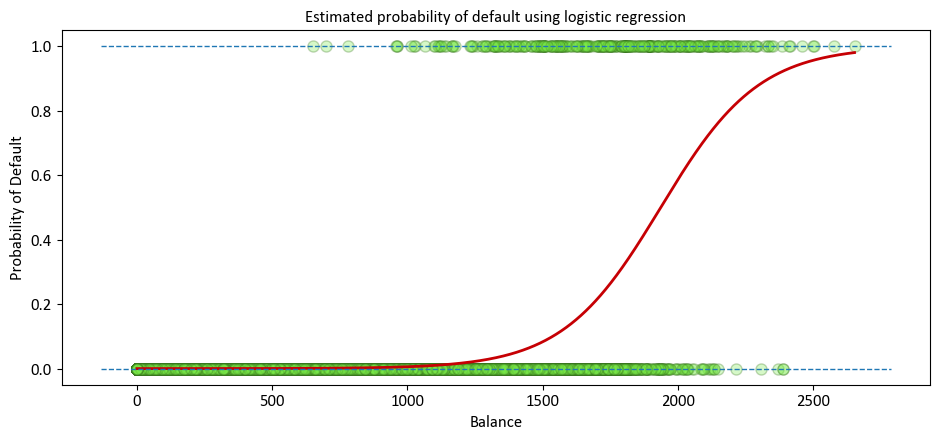

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(9.5, 4.5))
_ = ax.scatter(X, y, color='#7aea49', ec = '#38761d', alpha = 0.3)
_ = ax.plot(X_gen, Pred_proba[:, 1], color='#C60004', lw=2)
_ = ax.hlines([0, 1], *ax.get_xlim(), linestyles='dashed', lw=1)
_ = ax.set(xlabel = 'Balance', ylabel='Probability of Default',
              title = 'Estimated probability of default using logistic regression')
_ = ax.grid(False)
plt.tight_layout()

The predicted probabilities of default are showcased, derived from the logistic regression method. Unlike the left panel, these probabilities align with the fundamental concept of probability, always lying within the range of 0 to 1. This adherence to the proper probability range is a distinctive trait of logistic regression's predictions.

An alternative approach is to utilize the [**Statsmodels Generalized Linear Models**](https://www.statsmodels.org/devel/examples/notebooks/generated/glm_formula.html) library.

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Also recall our Reg_Result for OLS Reression results
def Reg_Result(Inp):
    Temp = pd.read_html(Inp.summary().tables[1].as_html(), header=0, index_col=0)[0]
    display(Temp.style\
    .format({'coef': '{:.4e}', 'P>|t|': '{:.4e}', 'std err': '{:.4e}'})\
    .bar(subset=['coef'], align='mid', color='Lime')\
    .set_properties(subset=['std err'], **{'background-color': 'DimGray', 'color': 'White'}))
    
model = smf.glm(formula = 'Default ~ Balance', data = df, family=sm.families.Binomial())
Results = model.fit()
print(Results.summary())
Reg_Result(Results)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.23
Date:                Mon, 20 Nov 2023   Deviance:                       1596.5
Time:                        20:31:16   Pearson chi2:                 7.15e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1240
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.0

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.0651e+01,3.6100e-01,-29.491000,0.000000,-11.359000,-9.943000
Balance,5.5000e-03,0.0000e+00,24.952000,0.000000,0.005000,0.006000


In particular, for
```python
model = smf.glm(formula='Default ~ Balance', data=df, family=sm.families.Binomial())
```
we have,

1. `formula='Default ~ Balance'`: This is the formula notation used to specify the relationship between the response variable ('Default') and the predictor variable ('Balance'). The tilde symbol (~) separates the response variable from the predictor variable. In this case, it signifies that we are modeling the influence of 'Balance' on the likelihood of 'Default'.

1. `family=sm.families.Binomial()`: This parameter defines the error distribution or family of the model. In this case, we're using the Binomial distribution, which is appropriate for binary response variables. The `sm.families.Binomial()` indicates that we're using the Binomial distribution from the Statsmodels library.

## Multiple Logistic Regression

Let's delve into an alternative logistic regression approach characterized by the following equation:

\begin{equation}
\log \left( \frac{p(X)}{1 - p(X)} \right) = \beta_0 + \beta_1 \times \text{Student} + \beta_2 \times \text{Balance} + \beta_3 \times \text{Income}
\end{equation}

This formulation encapsulates the likelihood of encountering default. It hinges on the contribution of multiple predictors, including 'Student' status, 'Balance', and 'Income'. The probability of default, $ p(X) $, is expressed as follows:

\begin{equation}
p(X) = \dfrac{e^{\beta_0 + \beta_1 \times \text{Student} + \beta_2 \times \text{Balance} + \beta_3 \times \text{Income}}}
{1 + e^{\beta_0 + \beta_1 \times \text{Student} + \beta_2 \times \text{Balance} + \beta_3 \times \text{Income}}}
\end{equation}

In this equation:
- $ \beta_0 $, $ \beta_1 $, $ \beta_2 $, and $ \beta_3 $ are the coefficients corresponding to the intercept, 'Student' status, 'Balance', and 'Income', respectively.
- 'Student', 'Balance', and 'Income' are the predictor variables that contribute to the logistic regression model.
- The natural logarithm ($ \log $) is applied to the odds ratio $ \frac{p(X)}{1 - p(X)} $ to linearly model the relationship between the predictors and the log-odds of default.
- The exponentiation ($ e^{\dots} $) within the formula facilitates the transformation of the log-odds back to the probability scale.

In essence, this logistic regression equation accounts for the combined influence of 'Student' status, 'Balance', and 'Income' in predicting the probability of default.

An alternative approach is to utilize the [**Statsmodels Generalized Linear Models**](https://www.statsmodels.org/devel/examples/notebooks/generated/glm_formula.html) library.

In [8]:
formula = 'Default ~ Student + Income + Balance'
model = smf.glm(formula = formula, data=df, family=sm.families.Binomial())
Results = model.fit()
print(Results.summary())
Reg_Result(Results)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9996
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -785.77
Date:                Mon, 20 Nov 2023   Deviance:                       1571.5
Time:                        20:31:16   Pearson chi2:                 7.00e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1262
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.0

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.0869e+01,4.9200e-01,-22.079000,0.000000,-11.834000,-9.904000
Student,-6.4680e-01,2.3600e-01,-2.738000,0.006000,-1.110000,-0.184000
Income,3.0330e-06,8.2000e-06,0.370000,0.712000,-0.000013,0.000019
Balance,5.7000e-03,0.0000e+00,24.737000,0.000000,0.005000,0.006000


As an illustration for the recent model, let's take the case of two individuals: James, a student, and Robert, a non-student. Both individuals possess a credit card balance of \$1,200 and an income of \$40,000. We can now examine the estimated probabilities of default for these two individuals:

In [9]:
df0=pd.DataFrame({'Student':[1,0],'Income':[40,40],'Balance':[1500,1500]},index=['James', 'Robert'])
display(df0)

,Student,Income,Balance
James,1,40,1500
Robert,0,40,1500


In [10]:
E=np.exp(Results.params['Intercept']+Results.params['Student']*df0['Student']\
+Results.params['Income']*df0['Income']+Results.params['Balance']*df0['Balance'])
P=E/(1+E)
pd.DataFrame(P,columns=['Probability of defaults'])

,Probability of defaults
James,0.051615
Robert,0.094135


This observation highlights that students generally exhibit higher probabilities of default compared to non-students.

## Confounding (Optional Content)

Confounding in statistics refers to a situation where the relationship between two variables is distorted or influenced by the presence of a third variable, known as a confounder or a confounding variable. This confounder is related to both the independent and dependent variables, creating a scenario where the observed association between the independent and dependent variables might be misleading or inaccurate {cite:p}`james2023introduction`.

Confounding variables can introduce bias and lead to incorrect conclusions when analyzing the relationship between variables. To address confounding, researchers need to carefully control or adjust for the effects of confounding variables in their analyses. This can be achieved through techniques like stratification, matching, or statistical modeling, such as multiple regression.

In essence, confounding occurs when the observed relationship between two variables is not a true causal relationship but is influenced by the presence of a third variable that affects both variables being studied. Identifying and accounting for confounding is crucial to ensuring accurate and reliable statistical analyses and interpretations.

In [11]:
from sklearn.linear_model import LogisticRegression
# Non-Students
# Extracting data for non-students
X_NotStudent = df.loc[df.Student == 0, 'Balance'].values.reshape(-1, 1)
y_NotStudent = df.loc[df.Student == 0, 'Default']
# Creating a logistic regression model for non-students
log_reg_NotStudent = LogisticRegression(solver='newton-cg')
_ = log_reg_NotStudent.fit(X_NotStudent, y_NotStudent)

# Students
# Extracting data for students
X_Student = df.loc[df.Student == 1, 'Balance'].values.reshape(-1, 1)
y_Student = df.loc[df.Student == 1, 'Default']
# Creating a logistic regression model for students
log_reg_Student = LogisticRegression(solver='newton-cg')
_ = log_reg_Student.fit(X_Student, y_Student)

# Generating test data
X_gen = np.arange(df['Balance'].min(), df['Balance'].max()).reshape(-1, 1)

# Predicting probabilities for non-students and students
predicted_proba_NotStudent = log_reg_NotStudent.predict_proba(X_gen)
predicted_proba_Student = log_reg_Student.predict_proba(X_gen)


Group = Default.groupby(['Student','Default']).size().unstack('Default')
display(Group)

Default,No,Yes
Student,,
No,6850,206
Yes,2817,127


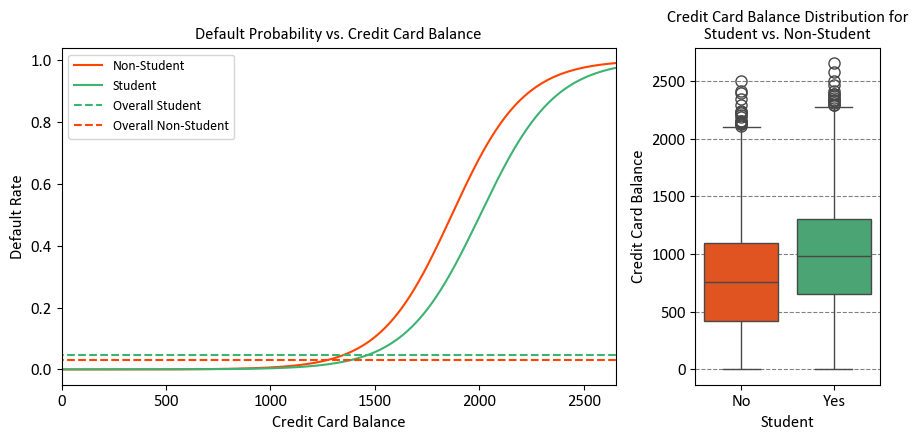

In [12]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(9, 4.5),gridspec_kw = {'width_ratios':[.75,.25]})

# Plot default probabilities for Non-Students and Students
_ = ax[0].plot(X_gen, predicted_proba_NotStudent[:, 1], color=CP['No'], label='Non-Student', lw = 1.5)
_ = ax[0].plot(X_gen, predicted_proba_Student[:, 1], color=CP['Yes'], label='Student', lw = 1.5)
Temp = ax[0].get_xlim()

# Plot dashed lines for overall default rates
_ = ax[0].hlines(Group.loc['Yes', 'Yes'] / Group.loc['Yes', 'No'], color=CP['Yes'],
                 lw = 1.5, label='Overall Student', xmin=Temp[0], xmax=Temp[1], linestyles='dashed')
_ = ax[0].hlines(Group.loc['No', 'Yes'] / Group.loc['No', 'No'],
                 lw = 1.5, color=CP['No'], label='Overall Non-Student',  xmin=Temp[0], xmax=Temp[1], linestyles='dashed')
# Set common labels, ticks, and limits for the left plot
_ = ax[0].set(title='Default Probability vs. Credit Card Balance',
              ylabel='Default Rate', xlabel='Credit Card Balance',
              xlim = (X_gen.min(), X_gen.max()),
              yticks = list(np.round(np.linspace(0, 1, 6), 1))
                 )
_ = ax[0].legend(loc=2)
_ = ax[0].grid(False)

# Create a boxplot for Student vs. Non-Student balance
_ = sns.boxplot(x='Student', y='Balance', data=Default, orient='v', ax=ax[1], palette=CP)
# Set common labels and title for the right plot
_ = ax[1].set(title='Credit Card Balance Distribution for\nStudent vs. Non-Student',
              xlabel='Student', ylabel='Credit Card Balance')

# Adjust layout and display the plots
plt.tight_layout()

The right-hand panel of the figure provides a clear explanation for the observed disparity. It's evident that the variables "student" and "balance" exhibit a correlation. Typically, students maintain higher levels of debt, and this higher indebtedness is associated with an elevated likelihood of default. In essence, students tend to carry larger credit card balances, a fact we glean from the left-hand panel of the figure, which also shows that substantial credit card balances are linked to elevated default rates.

Here's the crucial point: Even though an individual student with a specific credit card balance would generally have a lower default probability compared to a non-student with the same balance, the aggregate behavior emerges due to students, on average, maintaining larger credit card balances. Consequently, when considering the overall scenario, students exhibit a higher default rate than non-students. This distinction is pivotal, especially for a credit card company aiming to make informed decisions about extending credit.

The level of risk associated with a student surpasses that of a non-student when no information about the student's credit card balance is available. However, when comparing a student to a non-student with an equivalent credit card balance, the student is actually less risky.

**Visual representation**:
The left-hand panel illustrates default rates for students (orange) and non-students (green). The solid lines depict the default rate based on the balance, while the horizontal broken lines indicate the overall default rates. In the right-hand panel, we see boxplots representing the distribution of balance for students (orange) and non-students (green).

,Default,Student,Balance,Income
Default,1.00,0.04,0.35,-0.02
Student,0.04,1.00,0.20,-0.75
Balance,0.35,0.20,1.00,-0.15
Income,-0.02,-0.75,-0.15,1.00


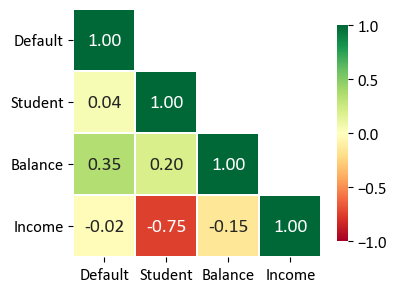

In [13]:
display(df.corr().style.background_gradient(cmap='RdYlGn', vmin= -1, vmax= 1).format(precision=2))

def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr().round(2)
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=True, square=True, 
                fmt='.2f', cmap = 'RdYlGn',
                linewidths = 0.2, vmin=-1, vmax=1,
                annot_kws={"size": 14}, cbar_kws={"shrink": .7})
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.grid(False)
    
Correlation_Plot (df, 4)

The table you provided is a correlation matrix that shows the pairwise correlations between different variables in the dataset. Each value in the table represents the correlation coefficient between two variables. The correlation coefficient measures the strength and direction of the linear relationship between two variables. Here's what each value in the table means:


- **Default and Student:** The correlation coefficient is 0.04. This indicates a very weak positive correlation between being a student and defaulting on payments. In other words, being a student has a very slight tendency to be associated with a slightly higher probability of defaulting.

- **Default and Balance:** The correlation coefficient is 0.35. This value indicates a moderate positive correlation between credit card balance and default. A higher credit card balance is associated with a moderately higher probability of defaulting.

- **Default and Income:** The correlation coefficient is -0.02. This indicates a very weak negative correlation between income and default. There's almost no noticeable linear relationship between income and the probability of defaulting.

- **Student and Balance:** The correlation coefficient is 0.20. This shows a weak positive correlation between being a student and credit card balance. Being a student is somewhat associated with having a slightly higher credit card balance.

- **Student and Income:** The correlation coefficient is -0.75. This indicates a strong negative correlation between being a student and income. Being a student is significantly associated with having lower income.

- **Balance and Income:** The correlation coefficient is -0.15. This represents a weak negative correlation between credit card balance and income. Individuals with higher credit card balances tend to have slightly lower incomes.


In summary, the correlation matrix provides insights into the relationships between different variables. Positive correlation values indicate that as one variable increases, the other tends to increase as well. Negative correlation values suggest that as one variable increases, the other tends to decrease. The magnitude of the correlation coefficient indicates the strength of the relationship, with values closer to 1 or -1 indicating a stronger correlation. However, correlation does not imply causation, and other factors may contribute to these relationships.

## Example: Synthetic Dataset

<font color='Blue'><b>Example</b></font>: In this code example, a Decision Tree Classifier is utilized to illustrate decision boundaries on synthetic data. The synthetic dataset is generated using the `make_blobs` function from scikit-learn, designed for creating artificial datasets for various machine learning experiments. This particular dataset consists of the following characteristics:

- **Number of Samples:** 1000
- **Number of Features:** 2
- **Number of Classes:** 2
- **Random Seed (random_state):** 0
- **Cluster Standard Deviation (cluster_std):** 1.0

**Features:**
- The dataset contains 1000 data points, each described by a pair of feature values. These features are represented as 'Feature 1' and 'Feature 2'.

**Outcome (Target Variable):**
- The dataset also includes a target variable called 'Outcome.' This variable assigns each data point to one of two distinct classes, identified as 'Class 0' and 'Class 1'.

The dataset has been designed to simulate a scenario with two well-separated clusters, making it suitable for binary classification tasks. Each data point in this dataset is associated with one of the two classes, and it can be used for practicing and evaluating machine learning algorithms that deal with binary classification problems.

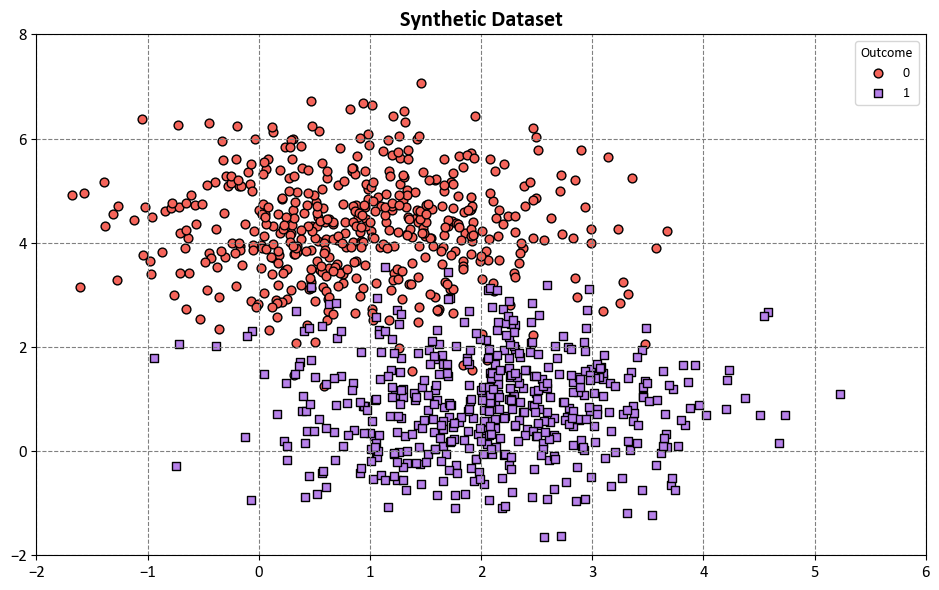

In [14]:
from sklearn.datasets import make_blobs
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=2, random_state=0, cluster_std=1.0)

# Create a scatter plot using Seaborn
fig, ax = plt.subplots(1, 1, figsize=(9.5, 6))

colors = ["#f5645a", "#b781ea"]
markers = ['o', 's']

# Scatter plot of data points
for num in np.unique(y):
    ax.scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
                s=40, edgecolors="k", marker=markers[num], label=str(num))

ax.set(xlim=[-2, 6], ylim=[-2, 8])
ax.legend(title = 'Outcome')
ax.set_title('Synthetic Dataset', weight = 'bold', fontsize = 16)
plt.tight_layout()

The synthetic dataset depicted above exhibits a balanced distribution between two classes.

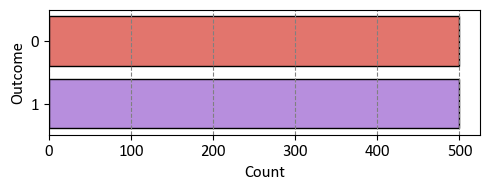

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(5, 2))
_ = sns.countplot(y = y, palette= colors, ec = 'k')
_ = ax.set(xlabel = 'Count', ylabel = 'Outcome' )
plt.tight_layout()

Next, Logistic Regression from the scikit-learn library {cite:p}`sklearnUserGuide` is employed for the classification of the aforementioned dataset.

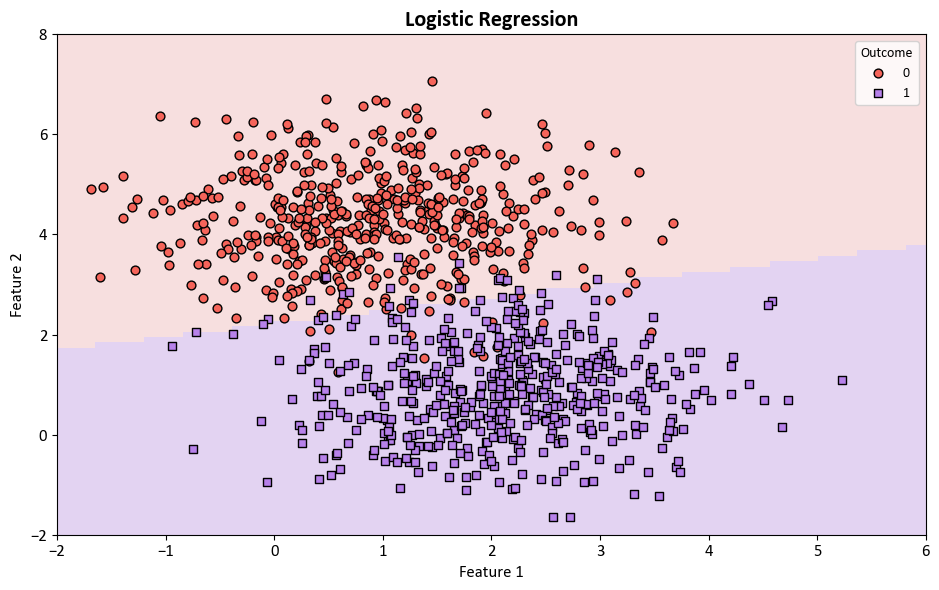

In [16]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

colors = ["#f5645a", "#b781ea"]
edge_colors = ['#8A0002', '#3C1F8B']
cmap_light = ListedColormap(['#f7dfdf', '#e3d3f2'])
markers = ['o', 's']

# Plot decision boundaries
fig, ax = plt.subplots(1, 1, figsize=(9.5, 6))
log_reg = LogisticRegression(max_iter = 200, solver = 'lbfgs')
log_reg.fit(X, y)
DecisionBoundaryDisplay.from_estimator(log_reg, X, cmap=cmap_light, ax=ax,
                                   response_method="predict",
                                   plot_method="pcolormesh",
                                   xlabel= 'Feature 1', ylabel='Feature 2',
                                   shading="auto")
# Scatter plot of data points
for num in np.unique(y):
    ax.scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
                s=40, edgecolors="k", marker=markers[num], label=str(num))

ax.set(xlim=[-2, 6], ylim=[-2, 8])
ax.legend(title = 'Outcome')
ax.set(xlim=[-2, 6], ylim=[-2, 8])
ax.set_title(f'Logistic Regression', fontweight='bold', fontsize = 16)
ax.grid(False)
plt.tight_layout()

In practical application, it is imperative to take into account the division of the dataset into two distinct subsets: one designated for model training and the other for model testing. This separation can be achieved using the `train_test_split` function, as exemplified below:

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')
print(f'Shape of X_test = {X_test.shape}')
print(f'Shape of y_test = {y_test.shape}')

log_reg = LogisticRegression()
_ = log_reg.fit(X_train, y_train)

def _gen_cr(model, X, y):
    y_pred = model.predict(X)
    Results = pd.DataFrame(classification_report(y, y_pred,
                                             output_dict=True)).T
    display(Results.style.format(precision = 3))
    
print('\nTrain Data:')
_gen_cr(log_reg, X_train, y_train)

print('\nTest Data:')
_gen_cr(log_reg, X_test, y_test)

Shape of X_train = (750, 2)
Shape of y_train = (750,)
Shape of X_test = (250, 2)
Shape of y_test = (250,)

Train Data:


,precision,recall,f1-score,support
0,0.965,0.965,0.965,372.000
1,0.966,0.966,0.966,378.000
accuracy,0.965,0.965,0.965,0.965
macro avg,0.965,0.965,0.965,750.000
weighted avg,0.965,0.965,0.965,750.000



Test Data:


,precision,recall,f1-score,support
0,0.952,0.938,0.945,128.000
1,0.935,0.951,0.943,122.000
accuracy,0.944,0.944,0.944,0.944
macro avg,0.944,0.944,0.944,250.000
weighted avg,0.944,0.944,0.944,250.000


`````{admonition} Remark
:class: important

The `classification_report` function in scikit-learn is a powerful tool for generating a comprehensive report that evaluates the performance of a classification model. It provides a breakdown of various metrics such as precision, recall, F1-score, and support for each class in the classification problem. This report helps you understand how well the model is performing for different classes and allows you to make informed decisions about its performance {cite:p}`pedregosa2011scikit,sklearnUserGuide`.

Here's the structure of the `classification_report` function:

```python
classification_report(y_true, y_pred, target_names=None, sample_weight=None, digits=2, output_dict=False)
```

- `y_true`: The true target values for the test set.
- `y_pred`: The predicted target values for the test set.
- `target_names`: A list of class names. If provided, it helps label the rows of the report.
- `sample_weight`: Optional weights that can be assigned to individual samples.
- `digits`: The number of decimal places for displaying the results.
- `output_dict`: If True, the function returns the classification report as a dictionary.

The output of `classification_report` is a nicely formatted string (if `output_dict` is False) or a dictionary (if `output_dict` is True) containing precision, recall, F1-score, and support metrics for each class. The metrics are calculated based on the true and predicted labels.

For example, if you have a binary classification problem with classes "Positive" and "Negative," the report might look like this:

```
              precision    recall  f1-score   support

    Positive       0.80      0.90      0.85       100
    Negative       0.70      0.50      0.58        50

    accuracy                           0.77       150
   macro avg       0.75      0.70      0.71       150
weighted avg       0.76      0.77      0.76       150
```

Here's what each metric means:
- **Precision**: The ability of the model to correctly identify positive instances among the instances it labeled as positive.
- **Recall**: The ability of the model to correctly identify all positive instances among all actual positive instances.
- **F1-score**: The harmonic mean of precision and recall. It balances precision and recall and is useful when classes are imbalanced.
- **Support**: The number of actual occurrences of the class in the test set.

`````

The performance of the trained model on both the training and testing datasets is as follows:

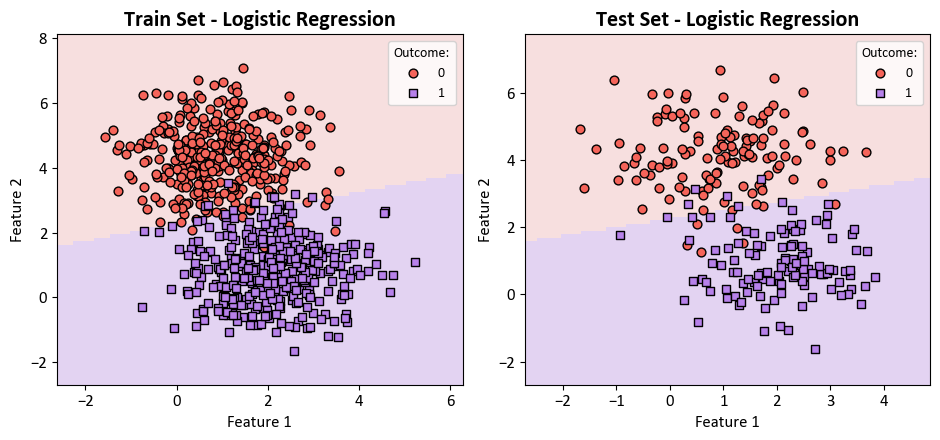

In [18]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

fig, axes = plt.subplots(1, 2, figsize=(9.5, 4.5))

# Create a loop for train and test sets
for i, (X_set, y_set, title) in enumerate([(X_train, y_train, 'Train Set'), (X_test, y_test, 'Test Set')]):
    # Plot decision boundaries
    DecisionBoundaryDisplay.from_estimator(log_reg, X_set, cmap=cmap_light, ax=axes[i],
                                           response_method="predict",
                                           plot_method="pcolormesh",
                                           xlabel='Feature 1', ylabel='Feature 2',
                                           shading="auto")
    for num in np.unique(y):
        axes[i].scatter(X_set[:, 0][y_set == num], 
                     X_set[:, 1][y_set == num], c=colors[num],
                    s=40, edgecolors="k", marker=markers[num], label=str(num))
        
    axes[i].legend(title = 'Outcome:')
    axes[i].set_title(f'{title} - Logistic Regression', fontweight='bold', fontsize=16)
    axes[i].grid(False)

plt.tight_layout()

Upon closer examination, it becomes evident that certain data points from the set X have been misclassified. These instances are visually highlighted with yellow circles in the subsequent figure.

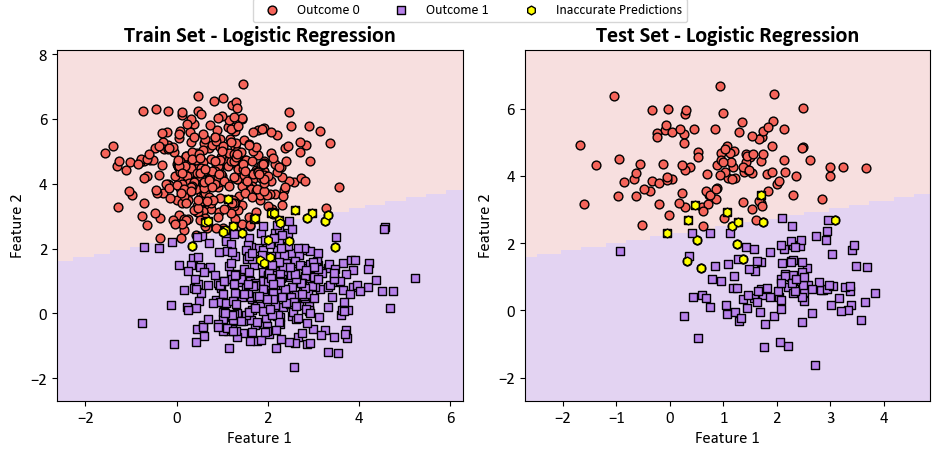

In [19]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

fig, axes = plt.subplots(1, 2, figsize=(9.5, 4.5))

# Create a loop for train and test sets
for i, (X_set, y_set, title) in enumerate([(X_train, y_train, 'Train Set'), (X_test, y_test, 'Test Set')]):
    # Plot decision boundaries
    DecisionBoundaryDisplay.from_estimator(log_reg, X_set, cmap=cmap_light, ax=axes[i],
                                           response_method="predict",
                                           plot_method="pcolormesh",
                                           xlabel='Feature 1', ylabel='Feature 2',
                                           shading="auto")
    for num in np.unique(y):
        axes[i].scatter(X_set[:, 0][y_set == num], 
                     X_set[:, 1][y_set == num], c=colors[num],
                    s=40, edgecolors="k", marker=markers[num], label= f'Outcome {num}')
        
    # Plot data points where y_set and log_reg(X_set) differ in color
    axes[i].scatter(X_set[:, 0][y_set != log_reg.predict(X_set)], 
                    X_set[:, 1][y_set != log_reg.predict(X_set)],
                    fc='Yellow', ec='black', s=40, marker= 'h', label= 'Inaccurate Predictions')
    
    axes[i].set_title(f'{title} - Logistic Regression', fontweight='bold', fontsize=16)
    axes[i].grid(False)
    # Remove the legend for each panel
    axes[i].legend()
    axes[i].get_legend().remove()

# Create a single legend for both subplots at the top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, borderaxespad= -0.1)
plt.tight_layout()

Lastly, we present the confusion matrix below:

In [24]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix  # Import necessary functions/classes

def format_confusion_matrix(cm, title):
    true_neg, false_pos, false_neg, true_pos = cm.ravel()
    result = f"\033[1m{title} Set Confusion Matrix\033[0m:\n"
    result += f"- {true_neg} instances were correctly predicted as class 0.\n"
    result += f"- {true_pos} instances were correctly predicted as class 1.\n"
    result += f"- {false_pos} instance was incorrectly predicted as class 1 when it was actually class 0.\n"
    result += f"- {false_neg} instances were incorrectly predicted as class 0 when they were actually class 1.\n"

    return result


def plot_cm(model, X_train, X_test, y_train, y_test, class_names, figsize=(7, 4)):
    # Create a figure and axes for displaying confusion matrices side by side
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    
    datasets = [(X_train, y_train, 'Train'), (X_test, y_test, 'Test')]

    for i in range(2):
        X, y, dataset_name = datasets[i]
        
        # Compute confusion matrix for the dataset predictions
        cm = confusion_matrix(y, model.predict(X))
        
        result = format_confusion_matrix(cm, dataset_name)
        print(result)
        
        # Create a ConfusionMatrixDisplay and plot it on the respective axis
        cm_display = ConfusionMatrixDisplay(cm, display_labels=class_names)\
                        .plot(ax=ax[i],
                              im_kw=dict(cmap='Greens' if dataset_name == 'Train' else 'Blues'),
                              text_kw={"size": 16}, colorbar=False)
        ax[i].set_title(f'{dataset_name} Data')
        ax[i].grid(False)

    # Add a super title for the entire figure
    fig.suptitle('Confusion Matrices', fontsize=16, weight = 'bold')

    # Adjust the layout for better spacing
    plt.tight_layout()

Train Set Confusion Matrix:
- 359 instances were correctly predicted as class 0.
- 365 instances were correctly predicted as class 1.
- 13 instance was incorrectly predicted as class 1 when it was actually class 0.
- 13 instances were incorrectly predicted as class 0 when they were actually class 1.

Test Set Confusion Matrix:
- 120 instances were correctly predicted as class 0.
- 116 instances were correctly predicted as class 1.
- 8 instance was incorrectly predicted as class 1 when it was actually class 0.
- 6 instances were incorrectly predicted as class 0 when they were actually class 1.



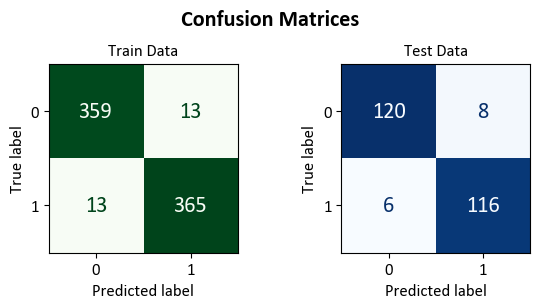

In [25]:
plot_cm(log_reg, X_train, X_test, y_train, y_test, ['0', '1'], figsize=(6, 3))